In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

### data 

In [2]:
mydata=pd.read_csv(r"C:\Users\mail2\OneDrive\Desktop\Ml_Data\Social_Network_Ads.csv")

In [3]:
mydata=mydata.drop("User ID",axis=1)

In [4]:
mydata.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

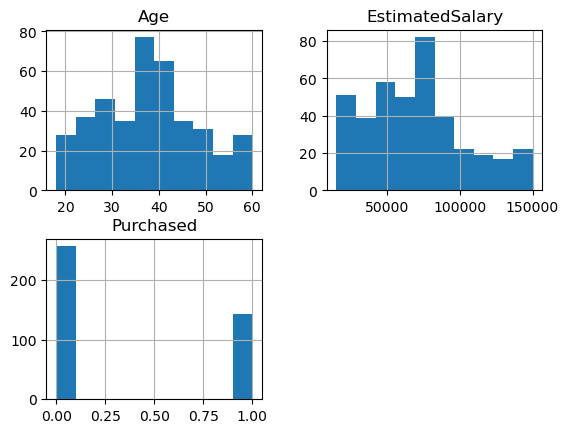

In [5]:
mydata.hist()
plt.show()

In [6]:
mydata.skew()

C:\Users\mail2\AppData\Local\Temp\ipykernel_16588\2806449618.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mydata.skew()


Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

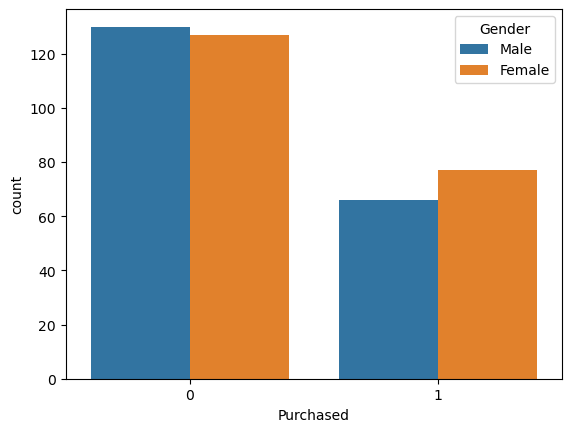

In [7]:
sb.countplot(x="Purchased",data=mydata,hue="Gender")
plt.show()

In [8]:
mydata.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0


In [9]:
X_IV=mydata.iloc[:,0:3]
Y_dep=mydata["Purchased"]

In [10]:
#Encode Male=0,Feame=1

In [11]:
X_IV["Gender"]=X_IV["Gender"].map({"Male":0,"Female":1})

In [12]:
mydata

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
#X_IV

### Split data into training and testing [70:30]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,Xtest,Y_train,Y_test=train_test_split(X_IV,Y_dep,test_size=.30,random_state=101)

In [16]:
print(f'toatal sample in x is {len(X_IV)} and total sample in y {len(Y_dep)}')

toatal sample in x is 400 and total sample in y 400


In [17]:
print(f'toatal sample in X_train is {len(X_train)} and total sample in Y_train {len(Y_train)}')
print(f'toatal sample in Xtest is {len(Xtest)} and total sample in Y_test {len(Y_test)}')

toatal sample in X_train is 280 and total sample in Y_train 280
toatal sample in Xtest is 120 and total sample in Y_test 120


### modeling>>algo>>training

In [18]:
trainer=LogisticRegression()
learner=trainer.fit(X_train,Y_train)

In [19]:
Yp_data=learner.predict([[1,23,71000]])
print(Yp_data)

[0]


C:\Users\mail2\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
Yp_prob=learner.predict_proba([[1,23,71000]])
print(Yp_prob)

[[0.53938321 0.46061679]]


C:\Users\mail2\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


###

In [21]:
Xtest

,Gender,Age,EstimatedSalary
38,1,26,72000
387,0,39,71000
270,1,43,133000
181,1,31,71000
195,0,34,43000
...,...,...,...
228,1,40,72000
178,0,24,23000
267,0,37,74000
147,1,41,30000


In [22]:
Yact=Y_test
Yp=learner.predict(Xtest)

In [23]:
#Yp.tolist()

In [24]:
Com_result=pd.DataFrame({"Ya":Yact.values.tolist(),"Yp":Yp.tolist()})

In [25]:
#Com_result

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
sccore=accuracy_score(Yact,Yp)

In [29]:
sccore*100

66.66666666666666

### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [31]:
cm=confusion_matrix(Yact,Yp)

In [32]:
print(cm)

[[80  0]
 [40  0]]


In [35]:
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])

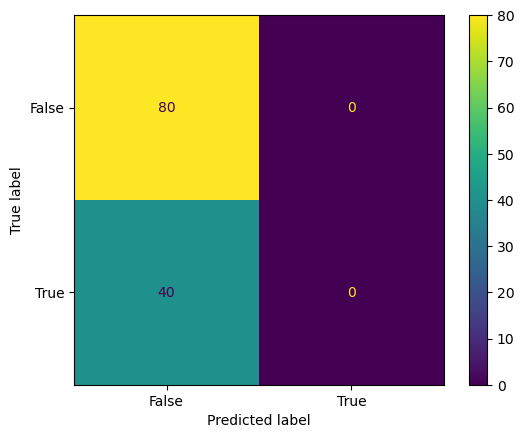

In [36]:
cm_matrix.plot()
plt.show()

In [37]:
cr=classification_report(Yact,Yp)

C:\Users\mail2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mail2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mail2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        80
           1       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.44      0.67      0.53       120

